In [173]:
import numpy as np

import scipy.io as sio

import matplotlib.pyplot as plt

# Part 1: Find Closest Centroids

In [174]:
print('Finding closest centroids.')

Finding closest centroids.


In [175]:
data = sio.loadmat(file_name='ex7data2.mat')
data.keys()
X = data['X']

In [176]:
K = 3 # 3 Centroids
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]], dtype=np.float)
initial_centroids

array([[3., 3.],
       [6., 2.],
       [8., 5.]])

In [177]:
x = X[0]
x

array([1.84207953, 4.6075716 ])

In [178]:
(initial_centroids- x)**2

array([[ 1.34077981,  2.58428646],
       [17.28830263,  6.79942967],
       [37.9199845 ,  0.15400005]])

In [179]:
np.sum((initial_centroids- x)**2, axis=1)

array([ 3.92506628, 24.0877323 , 38.07398455])

In [180]:
def findClosestCentroids(X, centroids):

    K = np.shape(centroids)[0]    

    idx = np.zeros(np.shape(X)[0], dtype=np.int)


    dist = np.zeros( np.shape(centroids)[0] )

    for i in range(np.shape(X)[0]):
        
        dist = np.sum((centroids- X[i])**2, axis=1)
        idx[i] = np.argmin(dist)

    return idx


In [181]:
def computeCentroids(X, idx, K):

    m, n = np.shape(X)

    centroids = np.zeros([K, n])

    for centroids_idx in range(K):

        pos = idx == centroids_idx
        centroids[centroids_idx,:] = np.sum( X[pos,:]/np.sum(pos) , axis=0)
    
    return centroids

In [182]:
idx = findClosestCentroids(X, initial_centroids)

In [183]:
print(f'Closest centroids for the first 3 examples: ')
print(f' { idx[0:3]+1 } ');
print(f'(the closest centroids should be 1, 3, 2 respectively)');

Closest centroids for the first 3 examples: 
 [1 3 2] 
(the closest centroids should be 1, 3, 2 respectively)


# Part 2: Compute Means

In [184]:
centroids = computeCentroids(X, idx, K)

In [185]:
print('Centroids computed after initial finding of closest centroids: ')
print(  centroids)
print('(the centroids should be')
print('   [ 2.428301 3.157924 ]')
print('   [ 5.813503 2.633656 ]')
print('   [ 7.119387 3.616684 ]')


Centroids computed after initial finding of closest centroids: 
[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]
(the centroids should be
   [ 2.428301 3.157924 ]
   [ 5.813503 2.633656 ]
   [ 7.119387 3.616684 ]


# Part 3: K-Means Clustering

In [186]:
print('Running K-Means clustering on example dataset.')

Running K-Means clustering on example dataset.


In [187]:
data = sio.loadmat(file_name='ex7data2.mat')
X = data['X']

In [188]:
K = 3
max_iters = 10

In [189]:
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

In [190]:
# import os
# import time 
# from IPython import display
# os.system("PAUSE")
def runkMeans(X, initial_centroids, max_iters, plot_progress = False):

    m, n = np.shape(X)
    K = np.shape(initial_centroids)[0]

    centroids = initial_centroids
    previous_centroids = []
    idx = np.zeros([m], dtype=np.int)

    for i in range(max_iters):
        print(f"Step nr: {i}")
        idx = findClosestCentroids(X, centroids)

        previous_centroids.append( centroids )

        if plot_progress:

            fig, ax = plt.subplots( figsize=(10,10) )

            ax.grid(True, linestyle='-.')
            
            colors = np.zeros([m,K])
            for j in range(m):
                colors[j,idx[j]] = 1

            ax.scatter(X[:,0], X[:,1], marker='o', c=colors  )
            ax.set_title(f'Iteration number {i}.')

            for j in range(len(previous_centroids)-1):
                for k in range(K):

                    ax.arrow( previous_centroids[j][k,0], previous_centroids[j][k,1] , previous_centroids[j+1][k,0]-previous_centroids[j][k,0], previous_centroids[j+1][k,1]-previous_centroids[j][k,1]  ,head_width=head_width, length_includes_head=True, color='k' )
            
            ax.scatter(centroids[:,0], centroids[:,1], marker='x',c=[[1,0,0],[0,1,0],[0,0,1] ]  )    




        centroids = computeCentroids(X, idx, K)  
        plt.show()


    return centroids, idx



Step nr: 0


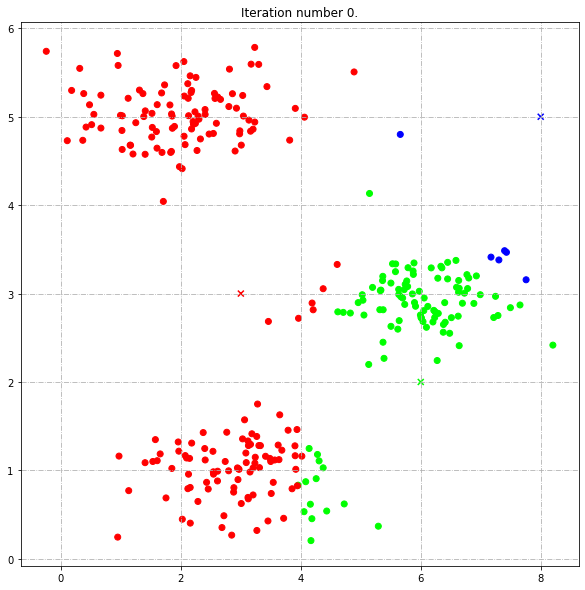

Step nr: 1


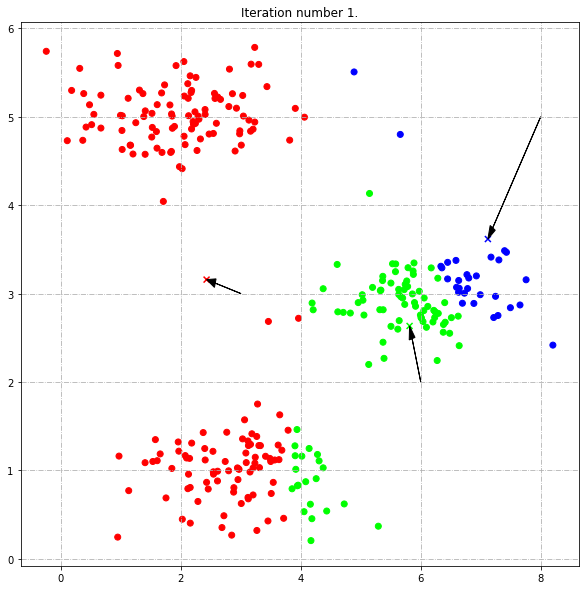

Step nr: 2


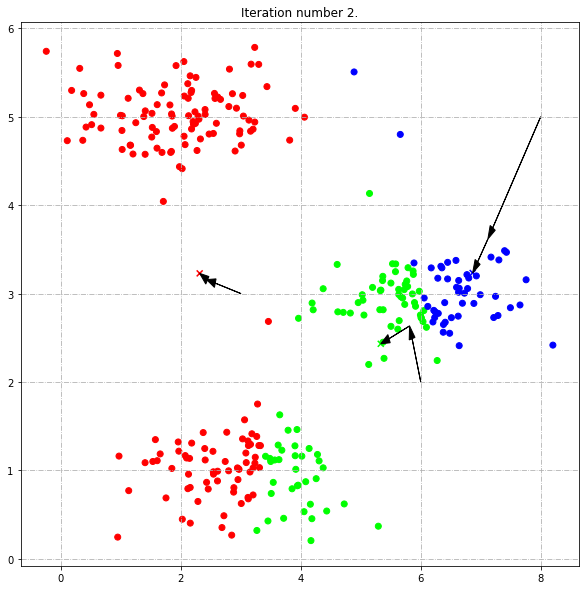

Step nr: 3


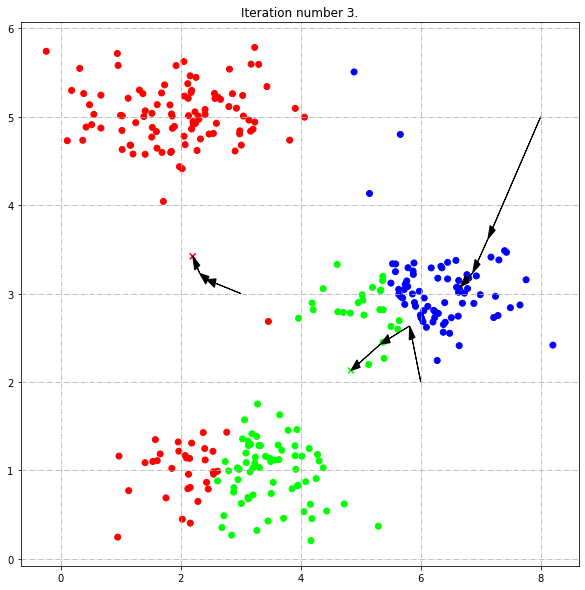

Step nr: 4


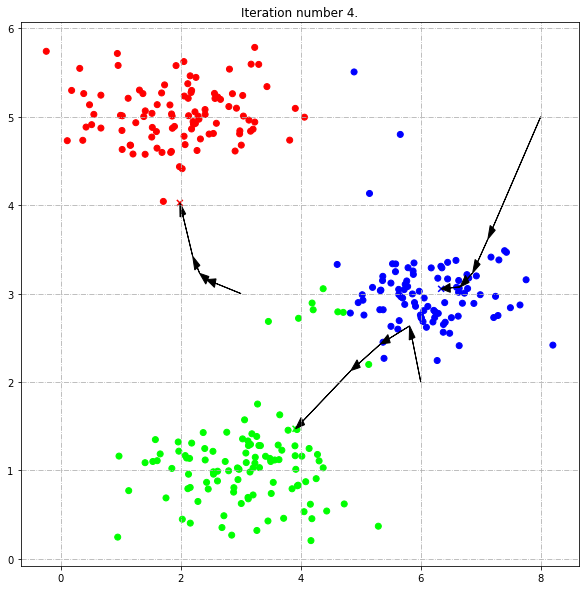

Step nr: 5


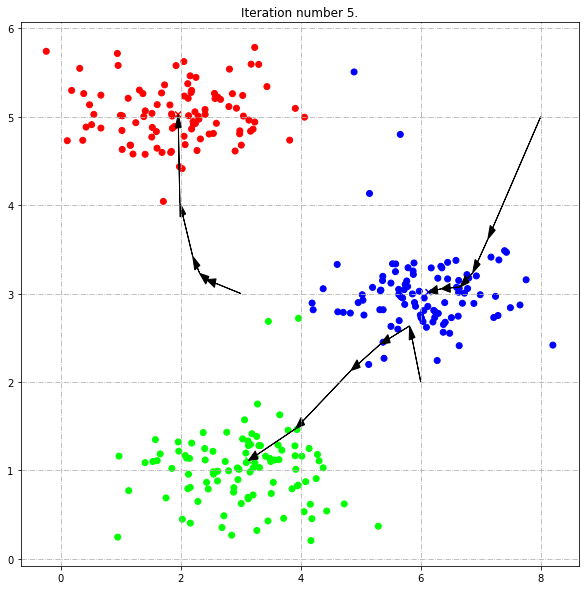

Step nr: 6


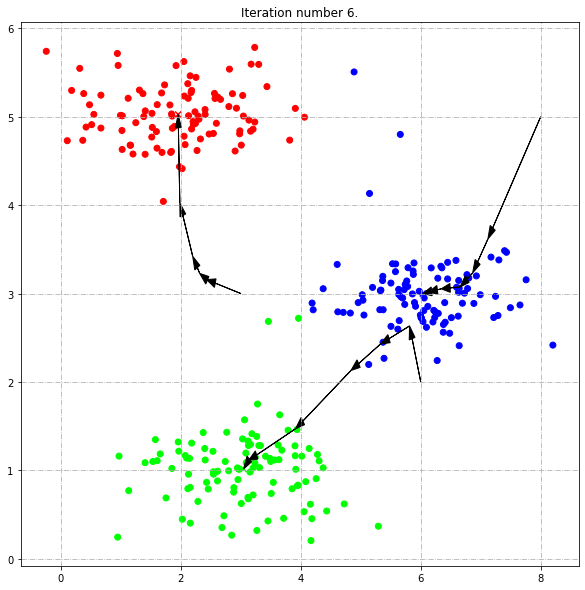

Step nr: 7


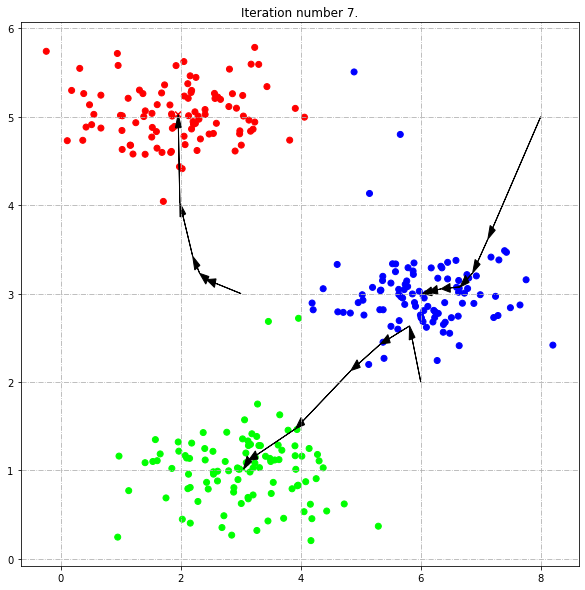

Step nr: 8


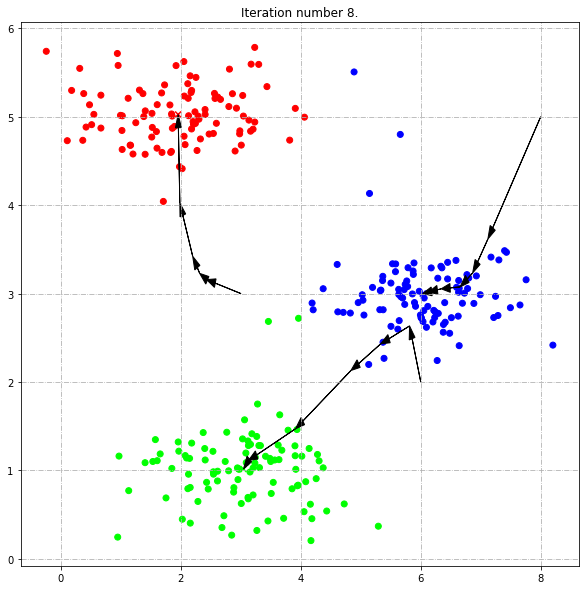

Step nr: 9


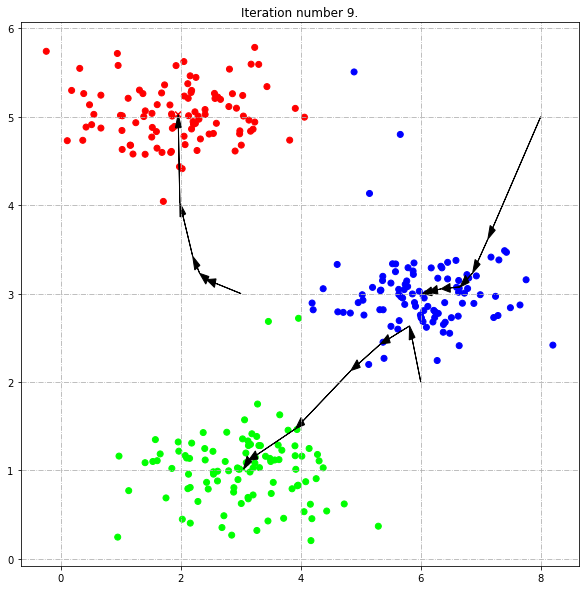

In [191]:
centroids, idx = runkMeans(X, initial_centroids, max_iters, True)

# Part 4: K-Means Clustering on Pixels 

In [192]:
from matplotlib.image import imread


In [193]:
print('Running K-Means clustering on pixels from an image.');

Running K-Means clustering on pixels from an image.


In [194]:
A = imread('bird_small.png')

In [195]:
img_size = np.shape(A)

In [196]:
X = np.reshape(A, [img_size[0] * img_size[1], 3])

In [197]:
K = 16
max_iters = 10

In [198]:
def kMeansInitCentroids(X, K):

    randidx = np.random.permutation(np.shape(X)[0])
    centroids = X[randidx[:K]]

    return centroids

initial_centroids = kMeansInitCentroids(X, K)

In [199]:
centroids, idx = runkMeans(X, initial_centroids, max_iters)

Step nr: 0
Step nr: 1
Step nr: 2
Step nr: 3
Step nr: 4
Step nr: 5
Step nr: 6
Step nr: 7
Step nr: 8
Step nr: 9


# Part 5: Image Compression

In [200]:
print('Applying K-Means to compress an image.')

Applying K-Means to compress an image.


In [201]:
idx = findClosestCentroids(X, centroids)

In [202]:
X_recovered = centroids[idx,:]
X_recovered = np.reshape(X_recovered, [img_size[0], img_size[1], 3]);

Text(0.5, 1.0, 'Compressed, with 16 colors.')

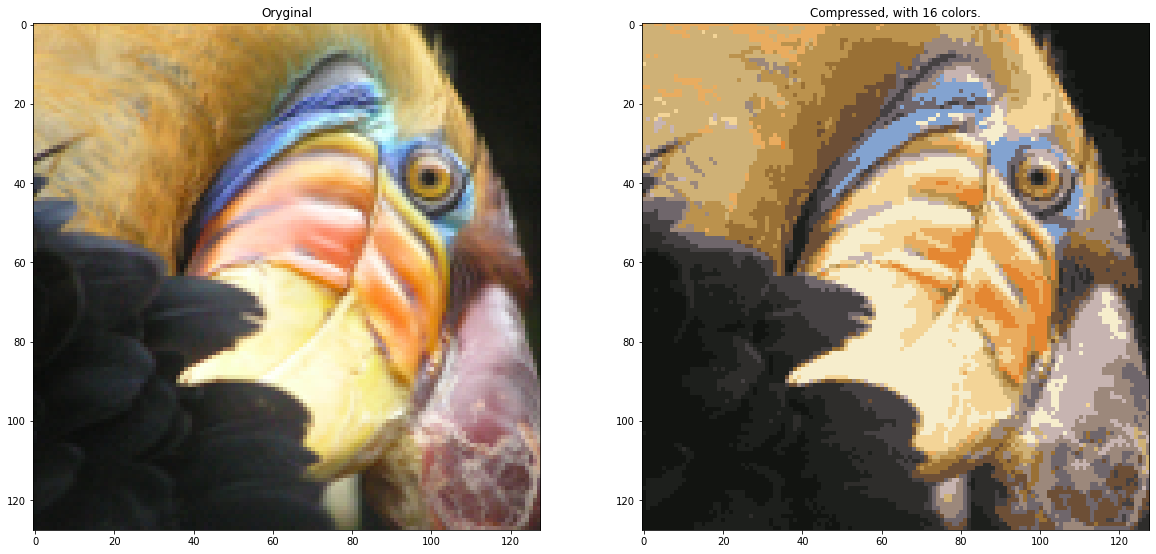

In [203]:
fig, axs = plt.subplots( figsize=(20,10), nrows=1, ncols=2 )

axs[0].imshow(A)
axs[0].set_title('Oryginal')

axs[1].imshow(X_recovered)
axs[1].set_title(f'Compressed, with {K} colors.')
